In [37]:
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [38]:
tesla = yf.Ticker("TSLA")
tesla_stock = tesla.history(period="max")
tesla_stock.reset_index(inplace=True)
tesla_stock.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [58]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text

In [50]:
soup = BeautifulSoup(data, "html.parser")

In [59]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [60]:
tables = soup.find_all("table")

tesla_rows = tables[0].find_all("tr")
tesla_data = []
for row in tesla_rows[1:]:  # Skip header
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            tesla_data.append([date, float(revenue)])
df_tesla_revenue = pd.DataFrame(tesla_data, columns=["Date", "Revenue"])
print("Tesla Revenue:")
print(df_tesla_revenue.tail())

Tesla Revenue:
    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


In [63]:
gme = yf.Ticker("GME")
gme_stock = gme.history(period="max")
gme_stock.reset_index(inplace=True)
print(gme_stock.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [65]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
soup = BeautifulSoup(data, "html.parser")

In [66]:
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [67]:
tables = soup.find_all("table")

gamestop_rows = tables[0].find_all("tr")
gamestop_data = []
for row in tesla_rows[1:]:  # Skip header
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue != "":
            gamestop_data.append([date, float(revenue)])
df_gamestop_revenue = pd.DataFrame(gamestop_data, columns=["Date", "Revenue"])
print("Gamestop Revenue:")
print(df_gamestop_revenue.tail())

Gamestop Revenue:
    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


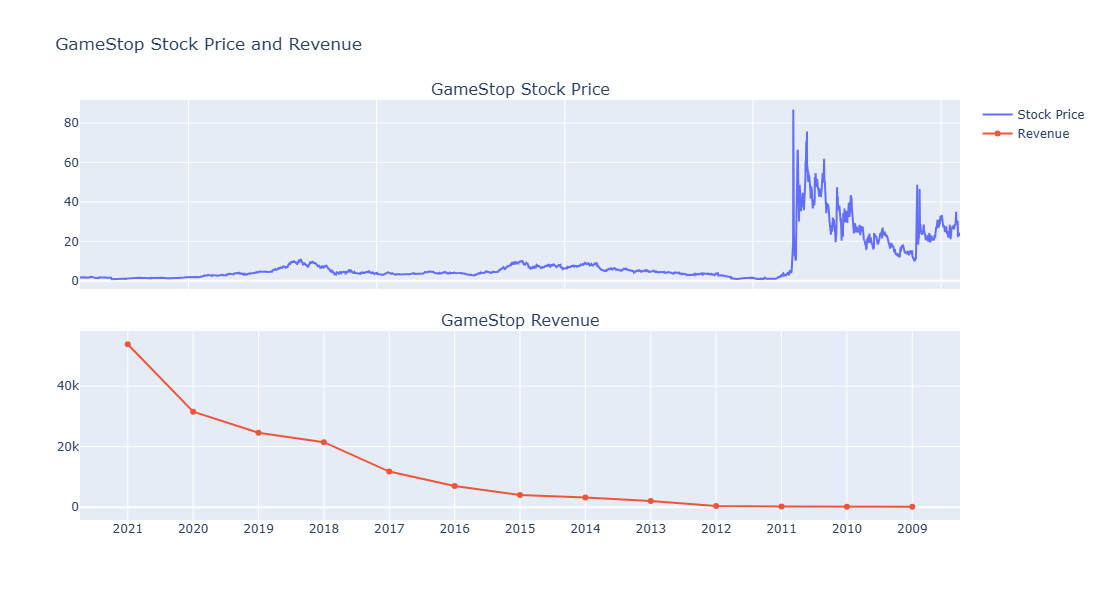

In [70]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("GameStop Stock Price", "GameStop Revenue"),
                    vertical_spacing=0.1)

fig.add_trace(go.Scatter(x=gme_stock['Date'], y=gme_stock['Close'], name="Stock Price"), row=1, col=1)
fig.add_trace(go.Scatter(x=df_gamestop_revenue['Date'], y=df_gamestop_revenue['Revenue'], name="Revenue"), row=2, col=1)

fig.update_layout(height=600, title="GameStop Stock Price and Revenue")
fig.show()